In [1]:
# Import necessary packages
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


## Data Cleaning

Read in the Census and drought data and clean the data, prepare for analysis

In [50]:
#California Income Levels by County in 2019

CAIncomeLevels2019 = pd.read_csv("data/Income_CA_Counties_ACSST5Y2019/CACounties_ACSST5Y2019.S1901_data_with_overlays.csv")
incomeDF = CAIncomeLevels2019[["GEO_ID", "NAME", "S1901_C01_001E", "S1901_C01_002E", "S1901_C01_003E", "S1901_C01_004E", "S1901_C01_005E", "S1901_C01_006E", "S1901_C01_007E", "S1901_C01_008E", "S1901_C01_009E", "S1901_C01_010E", "S1901_C01_011E", "S1901_C01_012E", "S1901_C01_013E"]]

#California Demographic Data by County in 2019

CAdemographics2019 = pd.read_csv("data/Demographics_CA_Counties_ACSSTY5Y2019/Demographics_CA_Counties_ACSSTY5Y2019_data.csv")
demographicDF = CAdemographics2019[["GEO_ID", "DP05_0001E", "DP05_0002PE", "DP05_0003PE", "DP05_0037PE", "DP05_0038PE", "DP05_0039PE", "DP05_0044PE", "DP05_0071PE"]]

#California Housing Characteristics by county in 2019

CAHousingCharacteristics2019 = pd.read_csv("data/Housing_Characteristics_CA_Counties_ACSST5Y2019/Housing_Characteristics_CA_Counties_ACSST5Y2019_Data.csv")
housingDF = CAHousingCharacteristics2019[["GEO_ID", "DP04_0001E", "DP04_0002E", "DP04_0002PE", "DP04_0003PE", "DP04_0005M", "DP04_0047E", "DP04_0047PE", "DP04_0127PE", "DP04_0128PE", "DP04_0129PE", "DP04_0131PE", "DP04_0132PE", "DP04_0133PE"]]


In [51]:
# Combine Dataframes from Census
censusDF = pd.merge(incomeDF, housingDF, on="GEO_ID", )
censusDF = pd.merge(censusDF, demographicDF, on="GEO_ID")

# Change column names to first row
censusDF.columns = censusDF.iloc[0]
censusDF = censusDF.drop(censusDF.index[0])

Write about your approach. Why did you print out the .info()? What did you see in the data? How did this inform your approahc moving forward (Ie you identified columns that are type object that should be type float, column names are off). Add some text here.

In [52]:
# information about new census dataframe
censusDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 59
Data columns (total 36 columns):
 #   Column                                                                                    Non-Null Count  Dtype 
---  ------                                                                                    --------------  ----- 
 0   id                                                                                        59 non-null     object
 1   Geographic Area Name                                                                      59 non-null     object
 2   Estimate!!Households!!Total                                                               59 non-null     object
 3   Estimate!!Households!!Total!!Less than $10,000                                            59 non-null     object
 4   Estimate!!Households!!Total!!$10,000 to $14,999                                           59 non-null     object
 5   Estimate!!Households!!Total!!$15,000 to $24,999                   

In [53]:
##Convert Columns to Numeric Where Possible
censusDF = censusDF.apply(pd.to_numeric, errors='ignore')

In [54]:
# Renaming Columns
            
censusDF.rename(columns = {'Estimate!!Households!!Total':'households_total', 
                           'Estimate!!Households!!Total!!Less than $10,000':'income_less_than_10000',
                           'Estimate!!Households!!Total!!$10,000 to $14,999':'income_10000_to_14999',
                           'Estimate!!Households!!Total!!$15,000 to $24,999':'income_15000_to_24999',
                           'Estimate!!Households!!Total!!$25,000 to $34,999':'income_25000_to_34999',
                           'Estimate!!Households!!Total!!$35,000 to $49,999':'income_35000_to_49999',
                           'Estimate!!Households!!Total!!$50,000 to $74,999':'income_50000_to_74999',
                           'Estimate!!Households!!Total!!$75,000 to $99,999':'income_75000_to_99999',
                           'Estimate!!Households!!Total!!$100,000 to $149,999':'income_100000_to_149999',
                           'Estimate!!Households!!Total!!$150,000 to $199,999':'income_150000_to_199999',
                           'Estimate!!Households!!Total!!$200,000 or more':'income_more_than_200000',
                           'Estimate!!Households!!Median income (dollars)':'median_income',
                           'Estimate!!Households!!Mean income (dollars)':'mean_income',
                           'Estimate!!HOUSING OCCUPANCY!!Total housing units':'totla_housing_units',
                           'Estimate!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units':'occupied_housing_units',
                           'Percent!!HOUSING OCCUPANCY!!Total housing units!!Occupied housing units':'percent_occupied_housing_units',
                           'Percent!!HOUSING OCCUPANCY!!Total housing units!!Vacant housing units':'percent_vacant_housing_units',
                           'Margin of Error!!HOUSING OCCUPANCY!!Total housing units!!Rental vacancy rate':'margin_of_error_rental_vacancy_rate',
                           'Estimate!!HOUSING TENURE!!Occupied housing units!!Renter-occupied':'renter_occupied_units',
                           'Percent!!HOUSING TENURE!!Occupied housing units!!Renter-occupied':'percent_renter_occupied',
                           'Percent!!GROSS RENT!!Occupied units paying rent!!Less than $500':'percent_rent_less_than_500',
                           'Percent!!GROSS RENT!!Occupied units paying rent!!$500 to $999': 'percent_rent_500_to_999',
                           'Percent!!GROSS RENT!!Occupied units paying rent!!$1,000 to $1,499': 'percent_rent_1000_to_1499',
                           'Percent!!GROSS RENT!!Occupied units paying rent!!$2,000 to $2,499':'percent_rent_2000_to_2499',
                           'Percent!!GROSS RENT!!Occupied units paying rent!!$2,500 to $2,999':'percent_rent_2500_to_2999',
                           'Percent!!GROSS RENT!!Occupied units paying rent!!$3,000 or more':'percent_rent_3000_or_more',
                           'Estimate!!SEX AND AGE!!Total population':'total_population',
                           'Percent!!SEX AND AGE!!Total population!!Male':'percent_male',
                           'Percent!!SEX AND AGE!!Total population!!Female':'percent_female',
                           'Percent!!RACE!!Total population!!One race!!White':'percent_white',
                           'Percent!!RACE!!Total population!!One race!!Black or African American':'percent_black_or_african_american',
                           'Percent!!RACE!!Total population!!One race!!American Indian and Alaska Native':'percent_american_indian_and_alaska_native',
                           'Percent!!RACE!!Total population!!One race!!Asian':'percent_asian',
                           'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)':'percent_hispanic_or_latino'
                          }, inplace = True)

In [55]:
#Check info after column change
censusDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 59
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         59 non-null     object 
 1   Geographic Area Name                       59 non-null     object 
 2   households_total                           59 non-null     int64  
 3   income_less_than_10000                     59 non-null     float64
 4   income_10000_to_14999                      59 non-null     float64
 5   income_15000_to_24999                      59 non-null     float64
 6   income_25000_to_34999                      59 non-null     float64
 7   income_35000_to_49999                      59 non-null     float64
 8   income_50000_to_74999                      59 non-null     float64
 9   income_75000_to_99999                      59 non-null     float64
 10  income_100000_to_149999     

In [8]:
#Dropping the 'California' row/total row. Should fix so that it isn't based on Index only. Look up row where 'California' is value for county
censusDF = censusDF.drop(59)

#Drop 'county' from county name
censusDF['county'] = censusDF['Geographic Area Name']
# censusDF["Estimate!!Households!!Total!!Less than $10,000"]
censusDF['county'] = censusDF.county.str.split(",", expand=True)[0].str.replace(" County", "")

## Create column of percentage income under 50,000
censusDF['income_less_than_50000'] = censusDF['income_less_than_10000'] + censusDF['income_10000_to_14999'] + censusDF['income_15000_to_24999'] +censusDF['income_25000_to_34999'] + censusDF['income_35000_to_49999']


In [9]:
censusDF.shape

(58, 38)

Add some text here about what this .describe() output is telling you. What do you see in the data? Any outliers? Any surprises? Anything you learned about the demographics of the state of the California? Add some analytical thinking here

In [10]:
censusDF.describe()

,households_total,income_less_than_10000,income_10000_to_14999,income_15000_to_24999,income_25000_to_34999,income_35000_to_49999,income_50000_to_74999,income_75000_to_99999,income_100000_to_149999,income_150000_to_199999,...,percent_rent_3000_or_more,total_population,percent_male,percent_female,percent_white,percent_black_or_african_american,percent_american_indian_and_alaska_native,percent_asian,percent_hispanic_or_latino,income_less_than_50000
count,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2.249011e+05,5.094828,4.929310,8.844828,8.874138,11.893103,16.867241,12.536207,15.312069,7.174138,...,3.581034,6.773017e+05,50.620690,49.379310,73.324138,3.160345,2.274138,7.441379,30.629310,39.636207
std,4.825731e+05,1.576407,1.851316,2.875192,2.503230,2.577831,2.867629,1.663825,3.044009,2.919298,...,5.867109,1.469524e+06,2.505696,2.505696,13.863296,2.971085,4.654202,8.482615,18.106847,9.905531
min,3.500000e+02,2.400000,1.900000,4.200000,4.400000,6.200000,9.800000,8.600000,9.100000,2.100000,...,0.000000,1.039000e+03,48.200000,34.000000,40.500000,0.100000,0.400000,0.000000,7.300000,20.000000
25%,1.841125e+04,3.925000,3.400000,6.725000,6.825000,10.150000,15.600000,11.725000,12.925000,4.950000,...,0.425000,4.764675e+04,49.500000,49.000000,62.150000,1.125000,0.700000,1.650000,14.675000,31.750000
50%,7.107750e+04,4.800000,4.650000,8.550000,9.250000,12.050000,17.250000,12.650000,15.700000,6.550000,...,0.900000,1.846320e+05,49.850000,50.150000,76.300000,1.950000,0.900000,4.300000,25.550000,39.500000
75%,2.187688e+05,6.250000,6.050000,11.075000,10.500000,13.875000,18.325000,13.300000,17.225000,9.700000,...,4.325000,6.927508e+05,51.000000,50.500000,84.500000,3.400000,1.875000,7.950000,44.725000,47.100000
max,3.316795e+06,9.900000,9.500000,15.900000,17.300000,16.400000,25.400000,18.500000,22.400000,13.500000,...,26.900000,1.008157e+07,66.000000,51.800000,97.500000,13.900000,34.000000,36.500000,84.200000,59.900000


In [11]:
censusDF.head(5)

,id,Geographic Area Name,households_total,income_less_than_10000,income_10000_to_14999,income_15000_to_24999,income_25000_to_34999,income_35000_to_49999,income_50000_to_74999,income_75000_to_99999,...,total_population,percent_male,percent_female,percent_white,percent_black_or_african_american,percent_american_indian_and_alaska_native,percent_asian,percent_hispanic_or_latino,county,income_less_than_50000
1,0500000US06001,"Alameda County, California",577177,4.1,3.5,5.5,5.5,7.7,12.5,11.5,...,1656754,49.2,50.8,40.5,10.6,0.7,30.1,22.4,Alameda,26.3
2,0500000US06003,"Alpine County, California",350,3.1,5.4,6.9,13.4,9.4,17.4,8.6,...,1039,53.3,46.7,57.7,0.9,34.0,1.0,12.5,Alpine,38.2
3,0500000US06005,"Amador County, California",14594,4.5,4.1,9.3,10.3,11.3,19.6,14.2,...,38429,53.7,46.3,86.7,2.4,0.8,1.3,13.9,Amador,39.5
4,0500000US06007,"Butte County, California",85320,7.0,6.6,11.3,10.2,13.0,16.9,11.4,...,225817,49.5,50.5,81.6,1.5,1.2,4.6,16.3,Butte,48.1
5,0500000US06009,"Calaveras County, California",16942,3.7,3.2,9.5,9.7,12.3,20.0,14.3,...,45514,49.8,50.2,90.5,0.7,0.8,1.5,12.1,Calaveras,38.4


In [12]:
# California 2015-2019 Weekly Drought Metrics by County

# Drought Metrics
# D0 (Abnormally Dry)
# D1 (Moderate Drought)
# D2 (Severe Drought)
# D3 (Extreme Drought)
# D4 (Exceptional Drought)

droughtDF = pd.read_csv("data/droughtMonitor2015_2019CACounties.csv")
droughtDF

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20191231,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.00,2019-12-31,2020-01-06,1
1,20191224,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.00,2019-12-24,2019-12-30,1
2,20191217,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.00,2019-12-17,2019-12-23,1
3,20191210,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.00,2019-12-10,2019-12-16,1
4,20191203,6001,Alameda County,CA,0.0,100.0,0.0,0.0,0.0,0.00,2019-12-03,2019-12-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15191,20150127,6115,Yuba County,CA,0.0,100.0,100.0,100.0,100.0,99.78,2015-01-27,2015-02-02,1
15192,20150120,6115,Yuba County,CA,0.0,100.0,100.0,100.0,100.0,99.78,2015-01-20,2015-01-26,1
15193,20150113,6115,Yuba County,CA,0.0,100.0,100.0,100.0,100.0,99.78,2015-01-13,2015-01-19,1
15194,20150106,6115,Yuba County,CA,0.0,100.0,100.0,100.0,100.0,0.00,2015-01-06,2015-01-12,1


Add some text about what you see in this .info() dump. What are you looking for? Does it look good? Bad?

In [13]:
droughtDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15196 entries, 0 to 15195
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MapDate            15196 non-null  int64  
 1   FIPS               15196 non-null  int64  
 2   County             15196 non-null  object 
 3   State              15196 non-null  object 
 4   None               15196 non-null  float64
 5   D0                 15196 non-null  float64
 6   D1                 15196 non-null  float64
 7   D2                 15196 non-null  float64
 8   D3                 15196 non-null  float64
 9   D4                 15196 non-null  float64
 10  ValidStart         15196 non-null  object 
 11  ValidEnd           15196 non-null  object 
 12  StatisticFormatID  15196 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 1.5+ MB


Same thing - what do you see in the data? What does this look like to you? Talk about what you see in the drought data and add some analysis here. 

In [14]:
droughtDF.describe()

,MapDate,FIPS,None,D0,D1,D2,D3,D4,StatisticFormatID
count,1.519600e+04,15196.00000,15196.000000,15196.000000,15196.000000,15196.000000,15196.000000,15196.000000,15196.0
mean,2.017063e+07,6058.00000,38.084714,61.915286,46.167013,35.522253,25.932301,15.958987,1.0
std,1.426078e+04,33.48244,46.638060,46.638060,48.030684,46.084624,41.537178,33.951601,0.0
min,2.014123e+07,6001.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.016033e+07,6029.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2.017067e+07,6058.00000,0.000000,100.000000,11.290000,0.000000,0.000000,0.000000,1.0
75%,2.018100e+07,6087.00000,100.000000,100.000000,100.000000,100.000000,64.330000,0.000000,1.0
max,2.019123e+07,6115.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.0


In [15]:
## Defining drought from the weekly granularity

## Grouping the drought weekly data by County and calculating the mean for the 6 categories 
droughtMeanDF = droughtDF.groupby(['County']).agg({'None': ['mean']})

##Creating a category to combine the five drought categories  
droughtMeanDF['drought'] = 100-droughtMeanDF['None']

In [16]:
## Removing 'County' from county name 

droughtMeanDF['county'] = droughtMeanDF.index.str.replace(" County", "")
droughtMeanDF.columns = droughtMeanDF.columns.droplevel()
droughtMeanDF.columns = ['none', 'drought', 'county']
droughtMeanDF.reset_index(drop=True, inplace=True)

In [17]:
## Merging the drought data with the census data
mergedDF = pd.merge(droughtMeanDF, censusDF, on="county", )

Here we print the final data frame ready for analysis with the Census and drought data merged together, where each row represents one county in the state of california.

In [18]:
mergedDF.head(5)

,none,drought,county,id,Geographic Area Name,households_total,income_less_than_10000,income_10000_to_14999,income_15000_to_24999,income_25000_to_34999,...,percent_rent_3000_or_more,total_population,percent_male,percent_female,percent_white,percent_black_or_african_american,percent_american_indian_and_alaska_native,percent_asian,percent_hispanic_or_latino,income_less_than_50000
0,41.416832,58.583168,Alameda,0500000US06001,"Alameda County, California",577177,4.1,3.5,5.5,5.5,...,10.1,1656754,49.2,50.8,40.5,10.6,0.7,30.1,22.4,26.3
1,46.381718,53.618282,Alpine,0500000US06003,"Alpine County, California",350,3.1,5.4,6.9,13.4,...,0.0,1039,53.3,46.7,57.7,0.9,34.0,1.0,12.5,38.2
2,51.215305,48.784695,Amador,0500000US06005,"Amador County, California",14594,4.5,4.1,9.3,10.3,...,0.0,38429,53.7,46.3,86.7,2.4,0.8,1.3,13.9,39.5
3,43.132863,56.867137,Butte,0500000US06007,"Butte County, California",85320,7.0,6.6,11.3,10.2,...,0.9,225817,49.5,50.5,81.6,1.5,1.2,4.6,16.3,48.1
4,48.396908,51.603092,Calaveras,0500000US06009,"Calaveras County, California",16942,3.7,3.2,9.5,9.7,...,1.2,45514,49.8,50.2,90.5,0.7,0.8,1.5,12.1,38.4


In [19]:
mergedDF.columns

Index(['none', 'drought', 'county', 'id', 'Geographic Area Name',
       'households_total', 'income_less_than_10000', 'income_10000_to_14999',
       'income_15000_to_24999', 'income_25000_to_34999',
       'income_35000_to_49999', 'income_50000_to_74999',
       'income_75000_to_99999', 'income_100000_to_149999',
       'income_150000_to_199999', 'income_more_than_200000', 'median_income',
       'mean_income', 'totla_housing_units', 'occupied_housing_units',
       'percent_occupied_housing_units', 'percent_vacant_housing_units',
       'margin_of_error_rental_vacancy_rate', 'renter_occupied_units',
       'percent_renter_occupied', 'percent_rent_less_than_500',
       'percent_rent_500_to_999', 'percent_rent_1000_to_1499',
       'percent_rent_2000_to_2499', 'percent_rent_2500_to_2999',
       'percent_rent_3000_or_more', 'total_population', 'percent_male',
       'percent_female', 'percent_white', 'percent_black_or_african_american',
       'percent_american_indian_and_alaska_nati

## Analysis 
Determine if there is a correlation between the drought index in the state of California at the county level and various Census variables, including income and race. 

In [20]:
## Creating Correlation Dataframe 
correlationDF = mergedDF.corr()

Write some words about what you see is this heat plot. What does this tell you about your hypothesis?

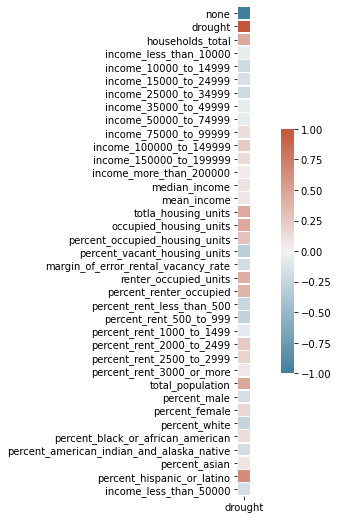

In [61]:
## Create heatmap of drought correlation to other variables
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
correlationHeatMap = sns.heatmap(correlationDF[['drought']], cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


correlationHeatMap.figure.savefig('images/CorrelationHeatMap.png')

Is this adding anything to your analysis? If not, delete it.

In [22]:
correlationDF

,none,drought,households_total,income_less_than_10000,income_10000_to_14999,income_15000_to_24999,income_25000_to_34999,income_35000_to_49999,income_50000_to_74999,income_75000_to_99999,...,percent_rent_3000_or_more,total_population,percent_male,percent_female,percent_white,percent_black_or_african_american,percent_american_indian_and_alaska_native,percent_asian,percent_hispanic_or_latino,income_less_than_50000
none,1.000000,-1.000000,-0.456885,0.061087,0.198805,0.150104,0.209303,0.057133,0.051268,-0.125363,...,-0.054421,-0.469157,0.161964,-0.161964,0.246366,-0.126496,0.169621,-0.078457,-0.647677,0.158209
drought,-1.000000,1.000000,0.456885,-0.061087,-0.198805,-0.150104,-0.209303,-0.057133,-0.051268,0.125363,...,0.054421,0.469157,-0.161964,0.161964,-0.246366,0.126496,-0.169621,0.078457,0.647677,-0.158209
households_total,-0.456885,0.456885,1.000000,-0.083017,-0.209833,-0.224877,-0.258780,-0.264378,-0.224325,-0.036039,...,0.237751,0.999117,-0.173511,0.173511,-0.462402,0.412426,-0.152422,0.404750,0.197088,-0.251901
income_less_than_10000,0.061087,-0.061087,-0.083017,1.000000,0.711683,0.787237,0.614961,0.584108,0.276748,-0.317044,...,-0.486761,-0.076412,-0.035593,0.035593,0.226250,-0.111182,-0.009392,-0.310490,0.004461,0.828077
income_10000_to_14999,0.198805,-0.198805,-0.209833,0.711683,1.000000,0.777753,0.610796,0.637078,0.171330,-0.234666,...,-0.520988,-0.205806,0.177619,-0.177619,0.329893,-0.228571,0.202315,-0.429805,-0.040592,0.846058
income_15000_to_24999,0.150104,-0.150104,-0.224877,0.787237,0.777753,1.000000,0.816921,0.678859,0.430108,-0.218515,...,-0.627798,-0.214464,0.216721,-0.216721,0.455360,-0.229334,0.102047,-0.539619,0.000850,0.944017
income_25000_to_34999,0.209303,-0.209303,-0.258780,0.614961,0.610796,0.816921,1.000000,0.642658,0.603206,-0.172432,...,-0.703366,-0.246246,0.279174,-0.279174,0.405079,-0.218952,0.448245,-0.614994,-0.081785,0.869101
income_35000_to_49999,0.057133,-0.057133,-0.264378,0.584108,0.637078,0.678859,0.642658,1.000000,0.665743,0.220612,...,-0.761355,-0.249298,0.162580,-0.162580,0.474162,-0.228160,0.085162,-0.669561,0.105614,0.831720
income_50000_to_74999,0.051268,-0.051268,-0.224325,0.276748,0.171330,0.430108,0.603206,0.665743,1.000000,0.405569,...,-0.719678,-0.209002,0.343067,-0.343067,0.384332,-0.093476,0.200684,-0.601974,0.122662,0.526598
income_75000_to_99999,-0.125363,0.125363,-0.036039,-0.317044,-0.234666,-0.218515,-0.172432,0.220612,0.405569,1.000000,...,-0.326783,-0.026456,0.023846,-0.023846,0.261080,0.044374,-0.356745,-0.283871,0.190913,-0.143904


Add some words about what this tells you about your hypothesis. Add some analysis.

<AxesSubplot:xlabel='None', ylabel='Count'>

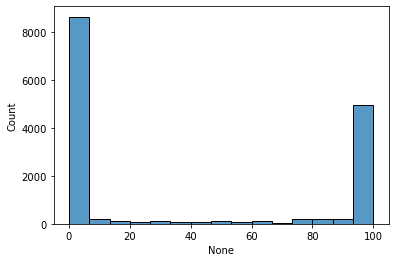

In [23]:
##Distribution of None category across all counties and all weeks 
sns.histplot(data=droughtDF['None'])

<AxesSubplot:xlabel='D0', ylabel='Count'>

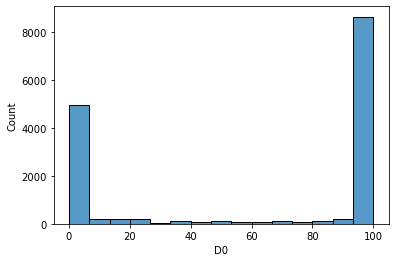

In [24]:
##Distribution of D0 category across all counties and all weeks 
sns.histplot(data=droughtDF['D0'])

<AxesSubplot:xlabel='D1', ylabel='Count'>

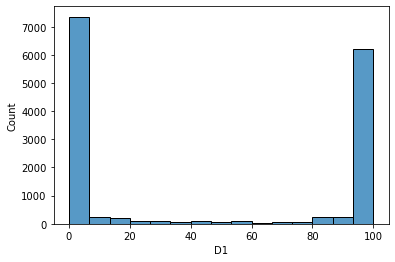

In [25]:
##Distribution of D1 category across all counties and all weeks 
sns.histplot(data=droughtDF['D1'])

<AxesSubplot:xlabel='D2', ylabel='Count'>

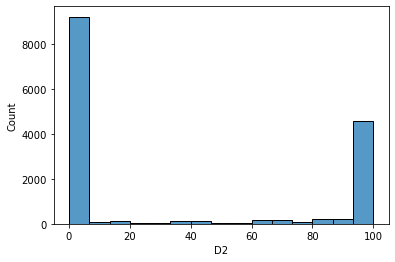

In [26]:
##Distribution of D2 category across all counties and all weeks 
sns.histplot(data=droughtDF['D2'])

<AxesSubplot:xlabel='D3', ylabel='Count'>

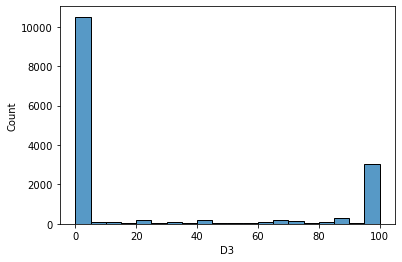

In [27]:
##Distribution of D3 category across all counties and all weeks 
sns.histplot(data=droughtDF['D3'])

<AxesSubplot:xlabel='D4', ylabel='Count'>

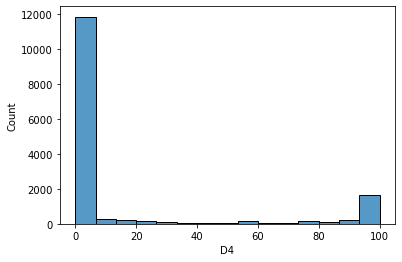

In [28]:
##Distribution of D4 category across all counties and all weeks 
sns.histplot(data=droughtDF['D4'])

What is this cell doing?

In [29]:
## Average per category
droughtDF.groupby('County')



In [30]:
##Counties with Most Drought
droughtByCounty = droughtDF.groupby(['County']).agg({'None': ['mean'], 'D0': ['mean'],'D1': ['mean'],
                                   'D2': ['mean'],'D3': ['mean'],'D4':['mean']})


droughtByCounty['county'] = droughtByCounty.index.str.replace(" County", "")
droughtByCounty.columns = droughtByCounty.columns.droplevel()
droughtByCounty.columns = ['None', 'D0', 'D1', 'D2', 'D3', 'D4', 'County']
droughtByCounty.reset_index(drop=True, inplace=True)

In [32]:
droughtByCounty.head(5)

,None,D0,D1,D2,D3,D4,County
0,41.416832,58.583168,42.890038,37.337328,30.854542,4.965038,Alameda
1,46.381718,53.618282,41.672863,40.213779,29.032786,23.996527,Alpine
2,51.215305,48.784695,40.939008,39.423168,27.058931,25.163053,Amador
3,43.132863,56.867137,41.758550,27.480916,25.595038,21.629580,Butte
4,48.396908,51.603092,41.656641,40.682366,36.599656,25.889885,Calaveras


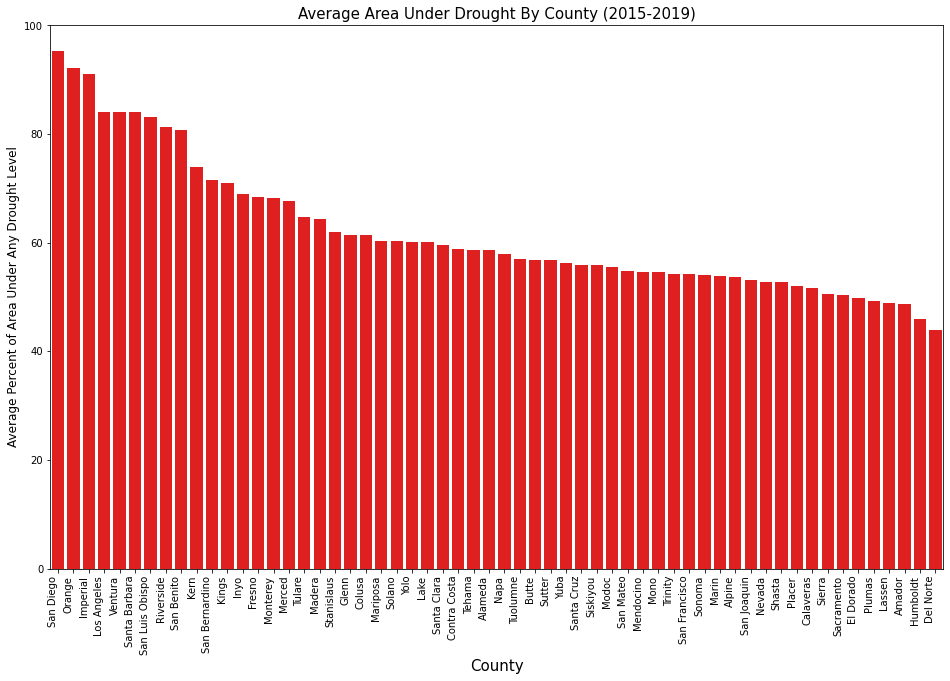

In [33]:
##https://seaborn.pydata.org/examples/many_facets.html 
fig = plt.gcf()
fig.set_size_inches(16, 10)
droughtBarPlot = sns.barplot(x="County", y="D0", data=droughtByCounty, 
                             order=droughtByCounty.sort_values("D0", ascending = False).County,
                             color = "Red"
                            )
plt.ylabel("Average Percent of Area Under Any Drought Level", size=12)
plt.xlabel("County", size=15)
plt.title("Average Area Under Drought By County (2015-2019)", size=15)
droughtBarPlot.set_xticklabels(droughtBarPlot.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')

droughtBarPlot.figure.savefig('images/droughtBarPlot.png')

In [34]:
droughtByCounty

,None,D0,D1,D2,D3,D4,County
0,41.416832,58.583168,42.890038,37.337328,30.854542,4.965038,Alameda
1,46.381718,53.618282,41.672863,40.213779,29.032786,23.996527,Alpine
2,51.215305,48.784695,40.939008,39.423168,27.058931,25.163053,Amador
3,43.132863,56.867137,41.758550,27.480916,25.595038,21.629580,Butte
4,48.396908,51.603092,41.656641,40.682366,36.599656,25.889885,Calaveras
5,38.659313,61.340687,48.921260,32.372290,26.037290,6.910649,Colusa
6,41.185611,58.814389,41.505229,37.812481,29.393702,2.535802,Contra Costa
7,56.020878,43.979122,25.131336,12.608282,0.000000,0.000000,Del Norte
8,50.270840,49.729160,40.620725,31.573168,25.793550,21.047557,El Dorado
9,31.543855,68.456145,52.892137,42.897405,41.018282,34.733282,Fresno


In [35]:
## Reshaping Dataframe so a bargraph average can be created 

newDF = pd.melt(droughtByCounty, id_vars="County", var_name="drought_category", value_name="percentage")
newDF


,County,drought_category,percentage
0,Alameda,None,41.416832
1,Alpine,None,46.381718
2,Amador,None,51.215305
3,Butte,None,43.132863
4,Calaveras,None,48.396908
...,...,...,...
343,Tulare,D4,39.711756
344,Tuolumne,D4,26.803779
345,Ventura,D4,41.032519
346,Yolo,D4,21.793664


/Users/brittanybennett/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


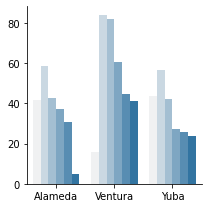

In [36]:
## This plot takes forever to run 
## Create FacetGrids to show total drought amount by County

#Test DF that is smaller to show what is going on 
smallDF = newDF[newDF['County'].isin(('Yuba', 'Alameda', 'Ventura'))]

g = sns.FacetGrid(smallDF)
g.map(sns.barplot, x='County', y='percentage', hue='drought_category', data=smallDF)

In [37]:
# ## Attempt at another type of Facetgrid
# droughtByCounty.plot(kind='bar', subplots=True, layout=(8,8), legend=False)

In [38]:
##Counties with Most Drought 
droughtByCounty.sort_values(by=['None'])


,None,D0,D1,D2,D3,D4,County
36,4.701794,95.298206,67.353817,54.688779,27.568244,0.000000,San Diego
29,7.773435,92.226565,81.684962,58.338473,41.221374,29.687443,Orange
12,9.039656,90.960344,78.658779,49.646718,10.340305,0.000000,Imperial
18,16.004809,83.995191,73.791947,58.044733,41.524389,35.124237,Los Angeles
55,16.030534,83.969466,81.679389,60.485954,44.549656,41.032519,Ventura
41,16.030687,83.969313,81.618931,61.116336,42.244924,40.633282,Santa Barbara
39,16.804847,83.195153,62.779733,49.625458,41.123053,38.316756,San Luis Obispo
32,18.692901,81.307099,62.555802,40.716565,10.863473,0.130229,Riverside
34,19.293817,80.706183,46.882939,42.174504,40.439313,31.139008,San Benito
14,26.080573,73.919427,60.407366,43.664427,41.069160,29.701221,Kern


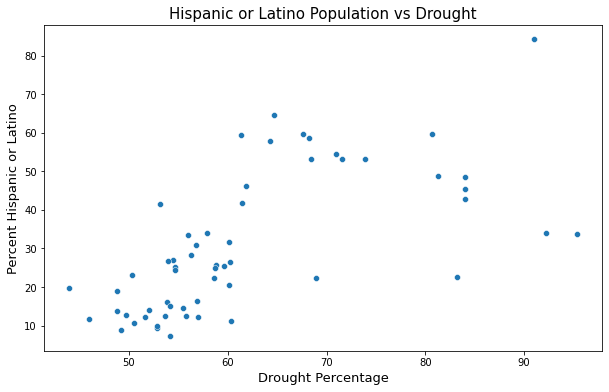

In [39]:
## Scatter Plot of Hispanic Population

scatterPlotDroughtvsHispanic = sns.scatterplot(data=mergedDF, x='drought', y='percent_hispanic_or_latino')
plt.ylabel("Percent Hispanic or Latino", size=13)
plt.xlabel("Drought Percentage", size=13)
plt.title("Hispanic or Latino Population vs Drought", size=15)
fig = plt.gcf()
fig.set_size_inches(10, 6)


scatterPlotDroughtvsHispanic.figure.savefig('images/scatterPlotDroughtvsHispanic.png')

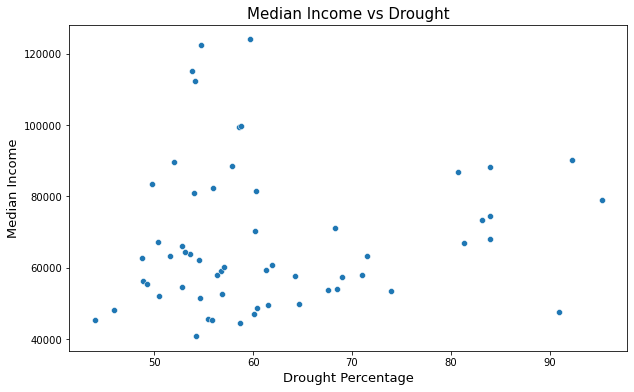

In [40]:
## Scatter Plot of Median Income

scatterPlotDroughtvsMedianIncome = sns.scatterplot(data=mergedDF, x='drought', y='median_income')
plt.ylabel("Median Income", size=13)
plt.xlabel("Drought Percentage", size=13)
plt.title("Median Income vs Drought", size=15)
fig = plt.gcf()
fig.set_size_inches(10, 6)

scatterPlotDroughtvsMedianIncome.figure.savefig('images/scatterPlotDroughtvsMedianIncome.png')

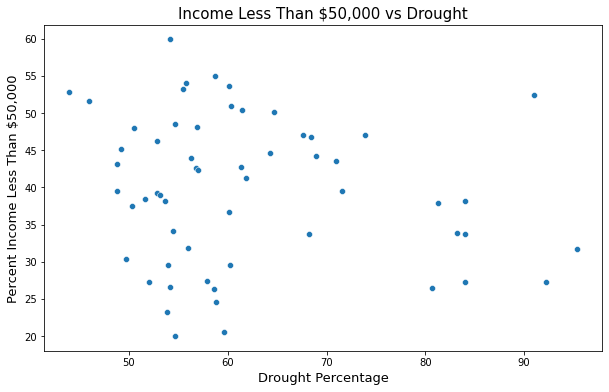

In [41]:
## Scatter Plot of income less than $50,000

scatterPlotDroughtvsIncomeLessThan50000 = sns.scatterplot(data=mergedDF, x='drought', y='income_less_than_50000')
plt.ylabel("Percent Income Less Than $50,000", size=13)
plt.xlabel("Drought Percentage", size=13)
plt.title("Income Less Than $50,000 vs Drought", size=15)
fig = plt.gcf()
fig.set_size_inches(10, 6)

scatterPlotDroughtvsIncomeLessThan50000.figure.savefig('images/scatterPlotDroughtvsIncomeLessThan50000.png')



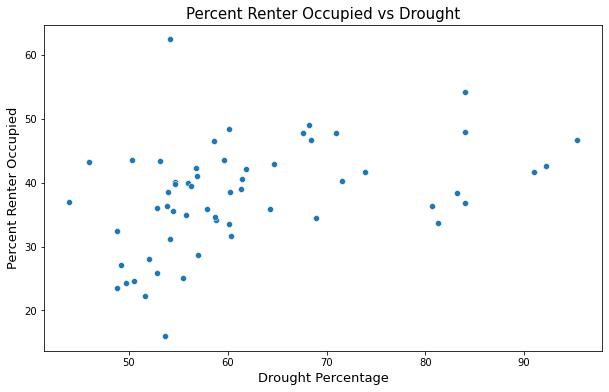

In [42]:
## Renter Occupied Scatter Plot

scatterPlotDroughtvsRenterOccupied = sns.scatterplot(data=mergedDF, x='drought', y='percent_renter_occupied')
plt.ylabel("Percent Renter Occupied", size=13)
plt.xlabel("Drought Percentage", size=13)
plt.title("Percent Renter Occupied vs Drought", size=15)
fig = plt.gcf()
fig.set_size_inches(10, 6)

scatterPlotDroughtvsRenterOccupied.figure.savefig('images/scatterPlotDroughtvsRenterOccupied.png')

In [43]:
droughtDF['date'] = pd.to_datetime(droughtDF['MapDate'], format='%Y%m%d')

In [44]:
# calaverasDF = droughtDF[['MapDate', 'drought']][droughtDF['county']=='Calaveras']


# sns.barplot(x='MapDate', y='drought', data=calaverasDF)

In [45]:
droughtDF

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID,date
0,20191231,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.00,2019-12-31,2020-01-06,1,2019-12-31
1,20191224,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.00,2019-12-24,2019-12-30,1,2019-12-24
2,20191217,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.00,2019-12-17,2019-12-23,1,2019-12-17
3,20191210,6001,Alameda County,CA,100.0,0.0,0.0,0.0,0.0,0.00,2019-12-10,2019-12-16,1,2019-12-10
4,20191203,6001,Alameda County,CA,0.0,100.0,0.0,0.0,0.0,0.00,2019-12-03,2019-12-09,1,2019-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15191,20150127,6115,Yuba County,CA,0.0,100.0,100.0,100.0,100.0,99.78,2015-01-27,2015-02-02,1,2015-01-27
15192,20150120,6115,Yuba County,CA,0.0,100.0,100.0,100.0,100.0,99.78,2015-01-20,2015-01-26,1,2015-01-20
15193,20150113,6115,Yuba County,CA,0.0,100.0,100.0,100.0,100.0,99.78,2015-01-13,2015-01-19,1,2015-01-13
15194,20150106,6115,Yuba County,CA,0.0,100.0,100.0,100.0,100.0,0.00,2015-01-06,2015-01-12,1,2015-01-06
